In [3]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --force-reinstall numpy opencv

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 816.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [16]:
pip install numpy opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define dataset paths
dataset_root = "D:\Pengyu\\VRBiom\\VRBiom\\data"  # Root directory containing subfolders with .avi files
output_path = "D:\\Pengyu\\VRBiom"  # Where extracted frames will be stored

# Create output folders
os.makedirs(output_path, exist_ok=True)

# Step 1: Recursively find all .avi files in subdirectories
video_files = []
for root, _, files in os.walk(dataset_root):
    for file in files:
        if file.endswith(".avi"):
            video_files.append(os.path.join(root, file))

# Step 2: Extract unique identities (Assume identity is in folder name or filename)
identities = list(set([os.path.basename(os.path.dirname(v)) for v in video_files]))  # Parent folder as identity

# Step 3: Split identities into train (33%), val (33%), test (33%) ensuring disjoint sets
train_ids, temp_ids = train_test_split(identities, test_size=0.5, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

# Step 4: Process videos and extract frames
for video_path in video_files:
    identity = os.path.basename(os.path.dirname(video_path))  # Identity from parent folder
    partition = "train" if identity in train_ids else "val" if identity in val_ids else "test"

    # Open video file
    cap = cv2.VideoCapture(video_path)
    
    frame_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Save every 10th frame
        if frame_idx % 10 == 0:
            save_folder = os.path.join(output_path, partition, identity)
            os.makedirs(save_folder, exist_ok=True)
            frame_filename = os.path.join(save_folder, f"{os.path.basename(video_path)}_frame{frame_idx}.jpg")
            cv2.imwrite(frame_filename, frame)

        frame_idx += 1
    
    cap.release()

print("Dataset processing complete! Frames are stored in:")
print(f"{output_path}/train, {output_path}/val, {output_path}/test")



<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7620\64461247.py:7: SyntaxWarning: invalid escape sequence '\P'
  dataset_root = "D:\Pengyu\\VRBiom\\VRBiom\\data"  # Root directory containing subfolders with .avi files


Dataset processing complete! Frames are stored in:
D:\Pengyu\VRBiom/train, D:\Pengyu\VRBiom/val, D:\Pengyu\VRBiom/test


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 定义图像尺寸和批次大小
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# 数据增强
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# 加载数据
train_generator = train_datagen.flow_from_directory(
    "D:\\Pengyu\\VRBiom\\train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)
import numpy as np
import os

# Function to extract class name from filename
def get_class_from_filename(filename):
    # Check if 'BF' is present in the filename
    if 'BF' in filename:
        return 'BF'
    return 'Other'  # For any filenames that don't contain 'BF'

# Apply function to each filename
class_labels = [get_class_from_filename(f) for f in train_generator.filenames]

# Convert labels to binary: 1 if 'BF' is found, otherwise 0
train_labels = np.array([1 if label == 'BF' else 0 for label in class_labels])

# Update the labels in the generator
train_generator.classes = train_labels


val_generator = val_test_datagen.flow_from_directory(
    "D:\\Pengyu\\VRBiom\\val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


test_generator = val_test_datagen.flow_from_directory(
    "D:\\Pengyu\\VRBiom\\test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)
# Apply function to each filename
class_labels_val = [get_class_from_filename(f) for f in val_generator.filenames]

# Convert labels to binary: 1 if 'BF' is found, otherwise 0
val_labels = np.array([1 if label == 'BF' else 0 for label in class_labels_val])

# Update the labels in the generator
val_generator.classes = val_labels

# Apply function to each filename
class_labels_test = [get_class_from_filename(f) for f in test_generator.filenames]

# Convert labels to binary: 1 if 'BF' is found, otherwise 0
test_labels = np.array([1 if label == 'BF' else 0 for label in class_labels_test])

# Update the labels in the generator
test_generator.classes = test_labels



Found 68394 images belonging to 58 classes.
Found 40080 images belonging to 29 classes.
Found 34478 images belonging to 30 classes.


In [2]:
print("Unique train labels:", np.unique(train_labels))
print("Unique val labels:", np.unique(val_labels))
print("Unique test labels:", np.unique(test_labels))

Unique train labels: [0 1]
Unique val labels: [0 1]
Unique test labels: [0 1]


In [5]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# 加载预训练模型（不包含分类头）
base_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# 冻结大部分层（只训练最后几层）
for layer in base_model.layers[:-10]:
    layer.trainable = False

# 构建分类头
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)  # 二分类问题

# 组合模型
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 回调函数：提前停止 & 动态调整学习率
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)

# 训练模型
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1078/1078 ━━━━━━━━━━━━━━━━━━━━ 336s 310ms/step
Optimal Threshold: 0.9862160086631775
EER: 21.15%


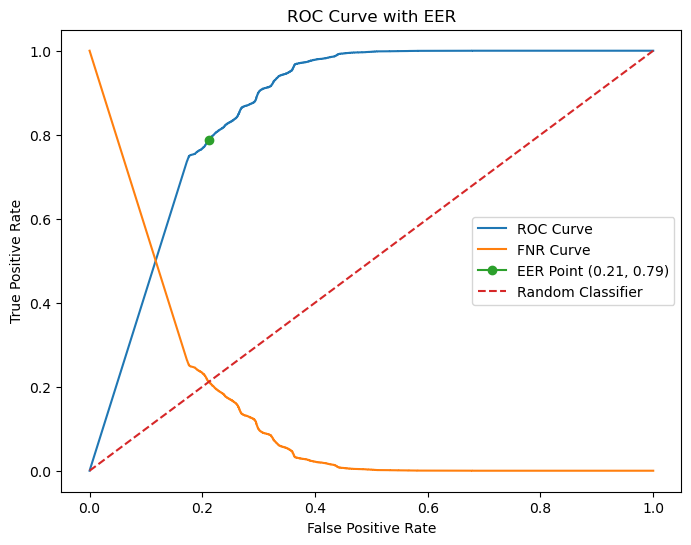

In [6]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator)  # Predicted probabilities

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calculate FNR (False Negative Rate)
fnr = 1 - tpr

# Find the optimal threshold where FPR equals FNR (EER)
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"EER: {eer * 100:.2f}%")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from scipy import interpolate

# 设置GPU内存动态增长
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Epoch 1/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1020s 475ms/step - accuracy: 0.9696 - loss: 0.0837 - val_accuracy: 0.9512 - val_loss: 0.2750
Epoch 2/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1014s 473ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9129 - val_loss: 0.6436
Epoch 3/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1013s 473ms/step - accuracy: 0.9976 - loss: 0.0090 - val_accuracy: 0.9126 - val_loss: 0.8979
Epoch 4/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1018s 475ms/step - accuracy: 0.9979 - loss: 0.0100 - val_accuracy: 0.9510 - val_loss: 0.4513
Epoch 5/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1020s 477ms/step - accuracy: 0.9982 - loss: 0.0085 - val_accuracy: 0.9423 - val_loss: 0.6492
Epoch 6/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1019s 476ms/step - accuracy: 0.9984 - loss: 0.0089 - val_accuracy: 0.9517 - val_loss: 0.6194
Epoch 7/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1023s 478ms/step - accuracy: 0.9988 - loss: 0.0099 - val_accuracy: 0.9634 - val_loss: 0.4901
Epoch 8/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1019s 476ms/s

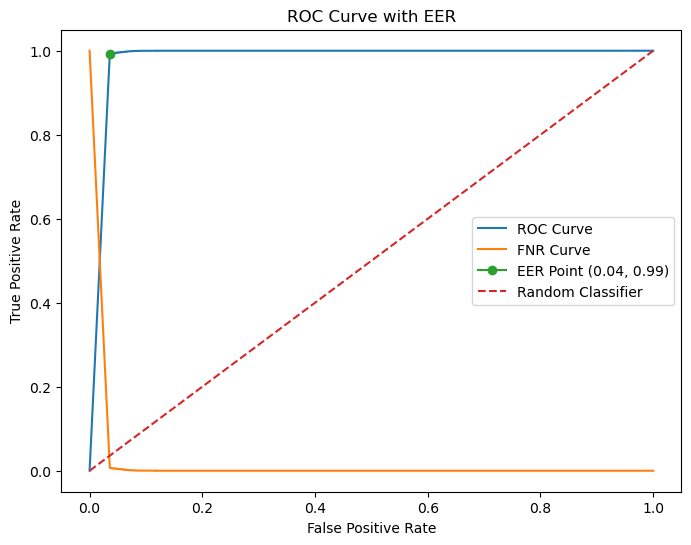

In [40]:
base_model = tf.keras.applications.MobileNet(input_shape=(224, 224, 3),
                                               alpha=1.0,
                                               depth_multiplier=1,
                                               dropout=0.001,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # 输出一个概率值
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 训练模型
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

# 测试模型
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# 获取预测结果
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = y_pred.ravel()

# 计算 ROC 和 AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 计算 EER (Equal Error Rate)
fnr = 1 - tpr

# Find the optimal threshold where FPR equals FNR (EER)
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"EER: {eer * 100:.2f}%")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d


In [9]:
# Load pre-trained ResNet-34 model (without top layer)
base_model = tf.keras.applications.ResNet50(  # ResNet-34 is not available in tf.keras, use ResNet50 instead
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, epochs=30, validation_data=val_generator)


Epoch 1/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2051s 956ms/step - accuracy: 0.6093 - loss: 0.6576 - val_accuracy: 0.6467 - val_loss: 0.5261
Epoch 2/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2043s 955ms/step - accuracy: 0.7057 - loss: 0.5400 - val_accuracy: 0.6726 - val_loss: 0.5095
Epoch 3/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2044s 955ms/step - accuracy: 0.7214 - loss: 0.5151 - val_accuracy: 0.7516 - val_loss: 0.4484
Epoch 4/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2041s 954ms/step - accuracy: 0.7258 - loss: 0.5032 - val_accuracy: 0.6819 - val_loss: 0.4589
Epoch 5/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2040s 953ms/step - accuracy: 0.7273 - loss: 0.4993 - val_accuracy: 0.7420 - val_loss: 0.4770
Epoch 6/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2039s 953ms/step - accuracy: 0.7328 - loss: 0.4891 - val_accuracy: 0.6680 - val_loss: 0.4559
Epoch 7/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2269s 1s/step - accuracy: 0.7334 - loss: 0.4912 - val_accuracy: 0.6387 - val_loss: 0.5073
Epoch 8/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 2106s 984ms/step

In [10]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')


1078/1078 ━━━━━━━━━━━━━━━━━━━━ 661s 613ms/step - accuracy: 0.7710 - loss: 0.4710
Test Accuracy: 0.8322


In [11]:
# Get true labels
y_true = test_generator.classes

# Get model predictions (probabilities)
y_scores = model.predict(test_generator).ravel()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Compute EER
fnr = 1 - tpr
eer_threshold = brentq(lambda x: 1. - x - interp1d(fpr, fnr)(x), 0., 1.)
eer = fpr[np.nanargmin(np.abs(fpr - fnr))]
print(f"EER: {eer * 100:.2f}%")


1078/1078 ━━━━━━━━━━━━━━━━━━━━ 640s 592ms/step
EER: 16.65%


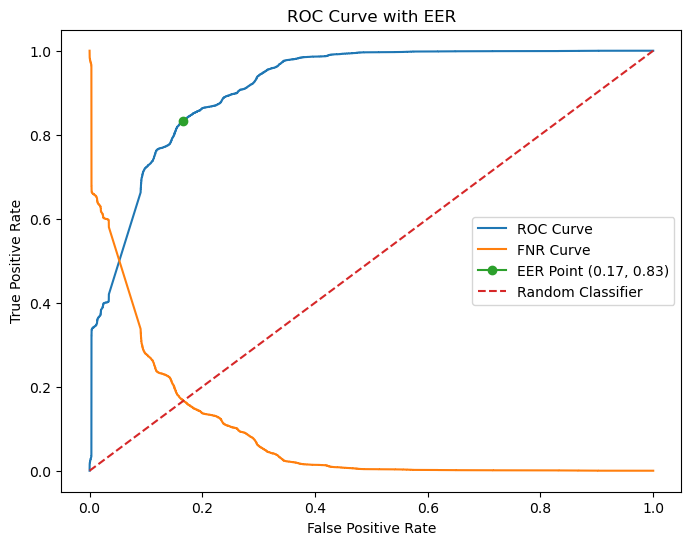

In [12]:
eer_index = np.nanargmin(np.abs(fnr - fpr))
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()




In [13]:
# Load pre-trained ResNet-50 model (without top layer)
base_model = tf.keras.applications.ResNet101(  
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, epochs=30, validation_data=val_generator)

Epoch 1/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 3544s 2s/step - accuracy: 0.6286 - loss: 0.6276 - val_accuracy: 0.8384 - val_loss: 0.4498
Epoch 2/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 3524s 2s/step - accuracy: 0.7144 - loss: 0.5149 - val_accuracy: 0.7582 - val_loss: 0.4301
Epoch 3/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 3522s 2s/step - accuracy: 0.7374 - loss: 0.4813 - val_accuracy: 0.6622 - val_loss: 0.5165
Epoch 4/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 3516s 2s/step - accuracy: 0.7421 - loss: 0.4756 - val_accuracy: 0.7582 - val_loss: 0.4778
Epoch 5/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 3517s 2s/step - accuracy: 0.7583 - loss: 0.4575 - val_accuracy: 0.7164 - val_loss: 0.5015
Epoch 6/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 3524s 2s/step - accuracy: 0.7615 - loss: 0.4482 - val_accuracy: 0.7743 - val_loss: 0.4625
Epoch 7/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 3523s 2s/step - accuracy: 0.7625 - loss: 0.4490 - val_accuracy: 0.6753 - val_loss: 0.5264
Epoch 8/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 3527s 2s/step - accuracy: 0.7641 -

In [14]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')


1078/1078 ━━━━━━━━━━━━━━━━━━━━ 1164s 1s/step - accuracy: 0.8824 - loss: 0.3674
Test Accuracy: 0.7849


In [15]:
# Get true labels
y_true = test_generator.classes

# Get model predictions (probabilities)
y_scores = model.predict(test_generator).ravel()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Compute EER
fnr = 1 - tpr
eer_threshold = brentq(lambda x: 1. - x - interp1d(fpr, fnr)(x), 0., 1.)
eer = fpr[np.nanargmin(np.abs(fpr - fnr))]
print(f"EER: {eer * 100:.2f}%")


1078/1078 ━━━━━━━━━━━━━━━━━━━━ 1163s 1s/step
EER: 18.38%


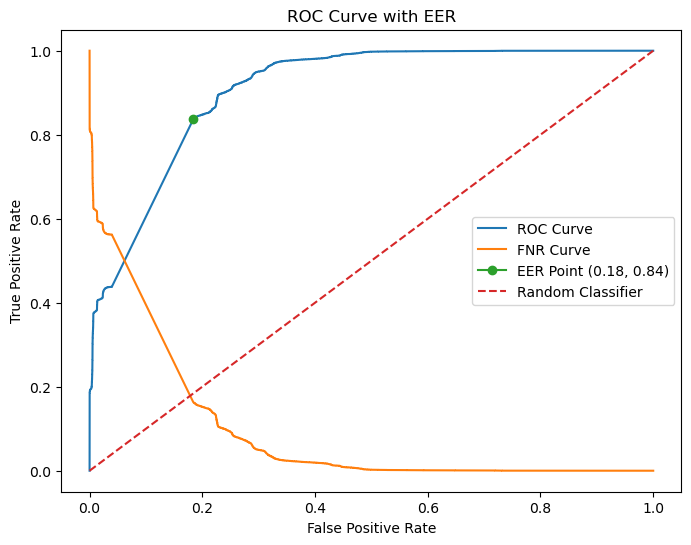

In [16]:
eer_index = np.nanargmin(np.abs(fnr - fpr))
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()


# one optimized model

In [18]:
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
import tensorflow.keras.backend as K
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


# 加载预训练模型（不包含分类头）
base_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# 冻结大部分层（只训练最后几层）
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)  # 代替 Flatten
x = Dense(512, activation="relu")(x)  # 增加神经元数
x = BatchNormalization()(x)  # 加 BN
x = Dropout(0.2)(x)  # Dropout 降低到 0.2，防止过拟合
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
output = Dense(1, activation="sigmoid")(x)


def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)
        pt = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        return -alpha * K.pow(1. - pt, gamma) * K.log(pt)
    return loss

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 回调函数：提前停止 & 动态调整学习率
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)

# 训练模型
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1513s 701ms/step - accuracy: 0.9119 - loss: 0.2218 - val_accuracy: 0.6583 - val_loss: 3.0356 - learning_rate: 0.0010
Epoch 2/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1080s 504ms/step - accuracy: 0.9772 - loss: 0.0647 - val_accuracy: 0.7239 - val_loss: 4.9275 - learning_rate: 0.0010
Epoch 3/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1086s 507ms/step - accuracy: 0.9853 - loss: 0.0444 - val_accuracy: 0.6267 - val_loss: 2.9001 - learning_rate: 0.0010
Epoch 4/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1089s 509ms/step - accuracy: 0.9892 - loss: 0.0318 - val_accuracy: 0.6676 - val_loss: 1.9293 - learning_rate: 0.0010
Epoch 5/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1088s 508ms/step - accuracy: 0.9923 - loss: 0.0236 - val_accuracy: 0.7640 - val_loss: 0.9434 - learning_rate: 0.0010
Epoch 6/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1086s 507ms/step - accuracy: 0.9947 - loss: 0.0174 - val_accuracy: 0.8772 - val_loss: 0.5760 - learning_rate: 0.0010
Epoch 7/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1086

1078/1078 ━━━━━━━━━━━━━━━━━━━━ 331s 306ms/step
Optimal Threshold: 0.6292217969894409
EER: 6.66%


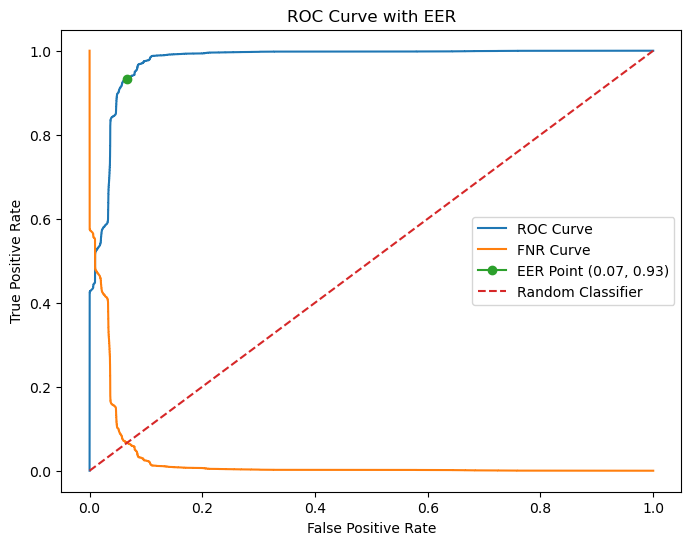

In [21]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Assume y_true and y_pred_prob are your true labels and predicted probabilities
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator)  # Predicted probabilities

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calculate FNR (False Negative Rate)
fnr = 1 - tpr

# Find the optimal threshold where FPR equals FNR (EER)
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"EER: {eer * 100:.2f}%")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()


#Efficient Net train

In [22]:
from tensorflow.keras.applications import EfficientNetV2B1
base_model = EfficientNetV2B1(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
# Freeze base model
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, epochs=30, validation_data=val_generator)

Epoch 1/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1209s 558ms/step - accuracy: 0.5897 - loss: 0.6833 - val_accuracy: 0.4311 - val_loss: 0.7300
Epoch 2/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1185s 554ms/step - accuracy: 0.5957 - loss: 0.6751 - val_accuracy: 0.4311 - val_loss: 0.7341
Epoch 3/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1194s 558ms/step - accuracy: 0.5961 - loss: 0.6746 - val_accuracy: 0.4311 - val_loss: 0.7350
Epoch 4/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1198s 560ms/step - accuracy: 0.5923 - loss: 0.6760 - val_accuracy: 0.4311 - val_loss: 0.7375
Epoch 5/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1203s 562ms/step - accuracy: 0.5932 - loss: 0.6757 - val_accuracy: 0.4311 - val_loss: 0.7370
Epoch 6/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1204s 563ms/step - accuracy: 0.5917 - loss: 0.6763 - val_accuracy: 0.4311 - val_loss: 0.7397
Epoch 7/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1201s 561ms/step - accuracy: 0.5954 - loss: 0.6748 - val_accuracy: 0.4311 - val_loss: 0.7363
Epoch 8/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1203s 562ms/s

1078/1078 ━━━━━━━━━━━━━━━━━━━━ 392s 362ms/step
Optimal Threshold: inf
EER: 0.00%


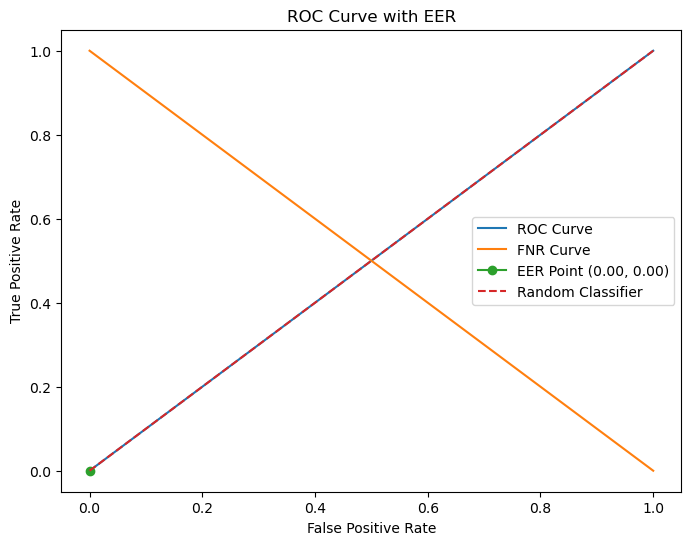

In [23]:
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator)  # Predicted probabilities

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calculate FNR (False Negative Rate)
fnr = 1 - tpr

# Find the optimal threshold where FPR equals FNR (EER)
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"EER: {eer * 100:.2f}%")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import backend as K
from sklearn.metrics import roc_curve, auc
import numpy as np

In [25]:
# **Focal Loss**
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)  # 避免 log(0) 错误
        pos_loss = -alpha * (y_true * K.pow(1 - y_pred, gamma) * K.log(y_pred))
        neg_loss = - (1 - alpha) * ((1 - y_true) * K.pow(y_pred, gamma) * K.log(1 - y_pred))
        return K.mean(pos_loss + neg_loss)
    return loss

# **AUC Maximization Loss**
def auc_loss():
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return loss

# **模型架构**
base_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# 冻结大部分层（只训练最后几层）
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)

model_mobilenetv3pro = Model(inputs=base_model.input, outputs=output)

# **选择损失函数（你可以选择 Focal Loss 或 AUC Loss）**
# model.compile(optimizer="adam", loss=focal_loss(), metrics=["accuracy"])
model_mobilenetv3pro.compile(optimizer="adam", loss=auc_loss(), metrics=["accuracy"])

In [26]:
# **训练模型**
model_mobilenetv3pro.fit(train_generator, epochs=30, validation_data=val_generator, steps_per_epoch=len(train_generator), validation_steps=len(val_generator))

Epoch 1/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1115s 516ms/step - accuracy: 0.9040 - loss: 0.2315 - val_accuracy: 0.7456 - val_loss: 0.5395
Epoch 2/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30


c:\Users\Admin\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1092s 510ms/step - accuracy: 0.9766 - loss: 0.0670 - val_accuracy: 0.5759 - val_loss: 3.0769
Epoch 4/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1095s 511ms/step - accuracy: 0.9837 - loss: 0.0463 - val_accuracy: 0.7805 - val_loss: 1.0541
Epoch 6/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1096s 512ms/step - accuracy: 0.9882 - loss: 0.0361 - val_accuracy: 0.6218 - val_loss: 2.2335
Epoch 8/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1098s 513ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.8853 - val_loss: 0.5001
Epoch 10/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 1095s 511ms/step - accuracy: 0.9949 - l

1078/1078 ━━━━━━━━━━━━━━━━━━━━ 341s 315ms/step
Optimal Threshold: 6.820644557592459e-06
EER: 7.18%


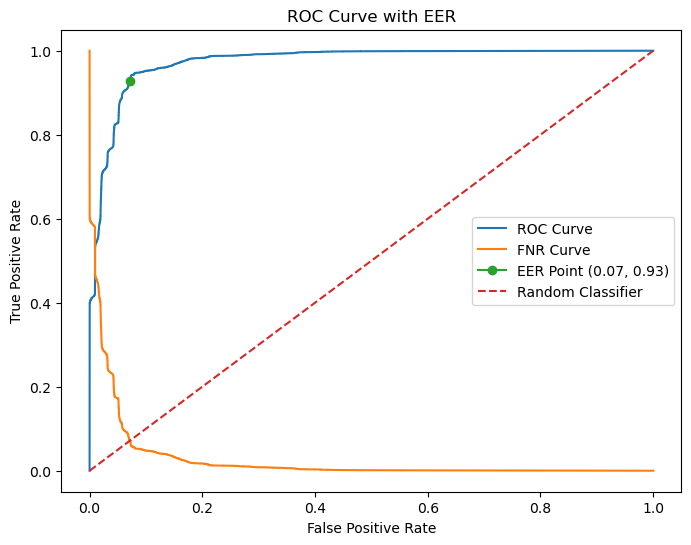

In [27]:
import matplotlib.pyplot as plt
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
y_true = test_generator.classes  # True labels
y_pred_mobilenetv3pro = model_mobilenetv3pro.predict(test_generator)  # Predicted probabilities

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_mobilenetv3pro)

# Calculate FNR (False Negative Rate)
fnr = 1 - tpr

# Find the optimal threshold where FPR equals FNR (EER)
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"EER: {eer * 100:.2f}%")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()

### 622 data prediction

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define dataset paths
dataset_root = "D:\Pengyu\\VRBiom\\VRBiom\\data"  # Root directory containing subfolders with .avi files
output_path = "D:\Pengyu\\VRBiom\\622"  # Where extracted frames will be stored

# Create output folders
os.makedirs(output_path, exist_ok=True)

# Step 1: Recursively find all .avi files in subdirectories
video_files = []
for root, _, files in os.walk(dataset_root):
    for file in files:
        if file.endswith(".avi"):
            video_files.append(os.path.join(root, file))

# Step 2: Extract unique identities (Assume identity is in folder name or filename)
identities = list(set([os.path.basename(os.path.dirname(v)) for v in video_files]))  # Parent folder as identity

# Step 3: Split identities into train (60%), val (20%), test (20%) ensuring disjoint sets
train_ids, temp_ids = train_test_split(identities, test_size=0.4, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

# Step 4: Process videos and extract frames
for video_path in video_files:
    identity = os.path.basename(os.path.dirname(video_path))  # Identity from parent folder
    partition = "train" if identity in train_ids else "val" if identity in val_ids else "test"

    # Open video file
    cap = cv2.VideoCapture(video_path)
    
    frame_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Save every 10th frame
        if frame_idx % 10 == 0:
            save_folder = os.path.join(output_path, partition, identity)
            os.makedirs(save_folder, exist_ok=True)
            frame_filename = os.path.join(save_folder, f"{os.path.basename(video_path)}_frame{frame_idx}.jpg")
            cv2.imwrite(frame_filename, frame)

        frame_idx += 1
    
    cap.release()

print("Dataset processing complete! Frames are stored in:")
print(f"{output_path}/train, {output_path}/val, {output_path}/test")



<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Admin\AppData\Local\Temp\ipykernel_12024\1825403985.py:7: SyntaxWarning: invalid escape sequence '\P'
  dataset_root = "D:\Pengyu\\VRBiom\\VRBiom\\data"  # Root directory containing subfolders with .avi files
C:\Users\Admin\AppData\Local\Temp\ipykernel_12024\1825403985.py:8: SyntaxWarning: invalid escape sequence '\P'
  output_path = "D:\Pengyu\\VRBiom\\622"  # Where extracted frames will be stored


Dataset processing complete! Frames are stored in:
D:\Pengyu\VRBiom\622/train, D:\Pengyu\VRBiom\622/val, D:\Pengyu\VRBiom\622/test


### Train val test split

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 定义图像尺寸和批次大小
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# 数据增强
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# 加载数据
train_generator = train_datagen.flow_from_directory(
    "D:\Pengyu\\VRBiom\\622\\train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)
import numpy as np
import os

# Function to extract class name from filename
def get_class_from_filename(filename):
    # Check if 'BF' is present in the filename
    if 'BF' in filename:
        return 'BF'
    return 'Other'  # For any filenames that don't contain 'BF'

# Apply function to each filename
class_labels = [get_class_from_filename(f) for f in train_generator.filenames]

# Convert labels to binary: 1 if 'BF' is found, otherwise 0
train_labels = np.array([1 if label == 'BF' else 0 for label in class_labels])

# Update the labels in the generator
train_generator.classes = train_labels


val_generator = val_test_datagen.flow_from_directory(
    "D:\Pengyu\\VRBiom\\622\\val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)


test_generator = val_test_datagen.flow_from_directory(
    "D:\Pengyu\\VRBiom\\622\\test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)
# Apply function to each filename
class_labels_val = [get_class_from_filename(f) for f in val_generator.filenames]

# Convert labels to binary: 1 if 'BF' is found, otherwise 0
val_labels = np.array([1 if label == 'BF' else 0 for label in class_labels_val])

# Update the labels in the generator
val_generator.classes = val_labels

# Apply function to each filename
class_labels_test = [get_class_from_filename(f) for f in test_generator.filenames]

# Convert labels to binary: 1 if 'BF' is found, otherwise 0
test_labels = np.array([1 if label == 'BF' else 0 for label in class_labels_test])

# Update the labels in the generator
test_generator.classes = test_labels


<>:21: SyntaxWarning: invalid escape sequence '\P'
<>:47: SyntaxWarning: invalid escape sequence '\P'
<>:55: SyntaxWarning: invalid escape sequence '\P'
<>:21: SyntaxWarning: invalid escape sequence '\P'
<>:47: SyntaxWarning: invalid escape sequence '\P'
<>:55: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Admin\AppData\Local\Temp\ipykernel_19644\22391467.py:21: SyntaxWarning: invalid escape sequence '\P'
  "D:\Pengyu\\VRBiom\\622\\train",
C:\Users\Admin\AppData\Local\Temp\ipykernel_19644\22391467.py:47: SyntaxWarning: invalid escape sequence '\P'
  "D:\Pengyu\\VRBiom\\622\\val",
C:\Users\Admin\AppData\Local\Temp\ipykernel_19644\22391467.py:55: SyntaxWarning: invalid escape sequence '\P'
  "D:\Pengyu\\VRBiom\\622\\test",


Found 89052 images belonging to 70 classes.
Found 25038 images belonging to 23 classes.
Found 28862 images belonging to 24 classes.


### Resnet 50 prediction

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50  
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
from scipy.optimize import brentq
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import time

# Load pre-trained ResNet-34 model (without top layer)
base_model = tf.keras.applications.ResNet50(  # ResNet-34 is not available in tf.keras, use ResNet50 instead
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False

# Add custom classification layers
model_resnet50 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model_resnet50.fit(train_generator, epochs=30, validation_data=val_generator)



Epoch 1/30


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3408s 1s/step - accuracy: 0.6077 - loss: 0.6464 - val_accuracy: 0.7668 - val_loss: 0.5374
Epoch 2/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 2166s 778ms/step - accuracy: 0.7303 - loss: 0.5163 - val_accuracy: 0.7332 - val_loss: 0.5013
Epoch 3/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 2168s 778ms/step - accuracy: 0.7451 - loss: 0.4916 - val_accuracy: 0.7768 - val_loss: 0.4409
Epoch 4/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 2175s 781ms/step - accuracy: 0.7520 - loss: 0.4833 - val_accuracy: 0.8102 - val_loss: 0.3943
Epoch 5/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 2534s 910ms/step - accuracy: 0.7547 - loss: 0.4751 - val_accuracy: 0.8033 - val_loss: 0.3827
Epoch 6/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 2168s 778ms/step - accuracy: 0.7644 - loss: 0.4606 - val_accuracy: 0.7174 - val_loss: 0.5319
Epoch 7/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 2178s 782ms/step - accuracy: 0.7572 - loss: 0.4635 - val_accuracy: 0.8115 - val_loss: 0.4020
Epoch 8/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 2379s 854ms/step - accuracy

902/902 ━━━━━━━━━━━━━━━━━━━━ 560s 620ms/step - accuracy: 0.8683 - loss: 0.2949
Test Accuracy: 0.8551
902/902 ━━━━━━━━━━━━━━━━━━━━ 539s 595ms/step
Optimal Threshold (EER): 0.6193
EER: 16.45%
Precision: 79.38%
Recall: 83.54%
F1 Score: 81.41%
Model Size: 91.98 MB
Avg Inference Time: 597.61 ms per batch


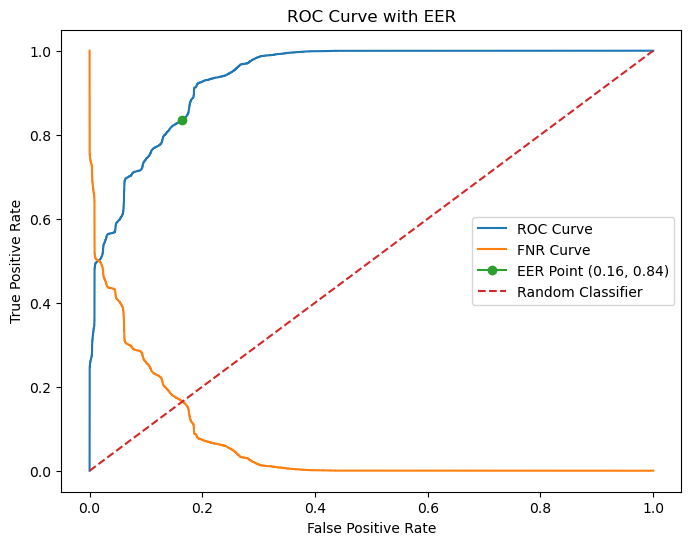

In [4]:
# Evaluate model on test set
test_loss, test_acc = model_resnet50.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')

# Get true labels
y_true = test_generator.classes

# Predict probabilities
start_time = time.time()
y_pred_prob = model_resnet50.predict(test_generator).ravel()
end_time = time.time()
elapsed_time = end_time - start_time
avg_inference_time = (elapsed_time / len(test_generator)) * 1000  # ms per batch

# Compute ROC & AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Compute EER
fnr = 1 - tpr
eer_index = np.nanargmin(np.abs(fpr - fnr))
eer_threshold = thresholds[eer_index]
eer = fpr[eer_index]

# Predict binary labels with EER threshold
y_pred_binary = (y_pred_prob >= eer_threshold).astype(int)

# Compute Precision, Recall, F1
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)

# Model size in MB
model_size = model_resnet50.count_params() * 4 / (1024 ** 2)

# Print metrics
print(f'Optimal Threshold (EER): {eer_threshold:.4f}')
print(f'EER: {eer * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Model Size: {model_size:.2f} MB')
print(f'Avg Inference Time: {avg_inference_time:.2f} ms per batch')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()

### PGD attack

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# **对抗攻击 - Projected Gradient Descent (PGD)**
# ------------------------------------------------------------
def pgd_attack(image, label, model, epsilon=0.03, alpha=0.005, iterations=10):
    """ 生成对抗样本 (PGD) """
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    label = tf.convert_to_tensor(label, dtype=tf.float32)
    
    if len(image.shape) == 3:
        image = tf.expand_dims(image, axis=0)
    
    adv_image = tf.identity(image)
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_image)
            prediction = model(adv_image, training=False)
            loss = tf.keras.losses.binary_crossentropy(tf.reshape(label, (-1, 1)), prediction)
        
        gradient = tape.gradient(loss, adv_image)
        perturbation = alpha * tf.sign(gradient)
        adv_image = adv_image + perturbation
        adv_image = tf.clip_by_value(adv_image, image - epsilon, image + epsilon)
        adv_image = tf.clip_by_value(adv_image, 0, 1)  # 保持像素值在 [0,1]
    
    return adv_image.numpy().squeeze(0)

# **对抗攻击 + 逐批处理，避免 OOM**
y_test = test_generator.classes
batch_size = test_generator.batch_size  # 获取批量大小

# 计算 EER 需要的变量
y_pred_adv_list = []
adv_labels_list = []

start_time = time.time()

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]  # 逐批加载数据
    adv_batch = np.array([pgd_attack(x, y, model_resnet50) for x, y in zip(x_batch, y_batch)])  # 生成对抗样本
    
    # 逐批进行预测，避免 OOM
    y_pred_adv_batch = model_resnet50.predict(adv_batch).ravel()
    
    y_pred_adv_list.append(y_pred_adv_batch)
    adv_labels_list.append(y_batch)

end_time = time.time()
adv_inference_time = (end_time - start_time) / len(y_test) * 1000  # 计算平均推理时间

# **拼接所有对抗样本预测结果**
y_pred_adv = np.concatenate(y_pred_adv_list, axis=0)
adv_labels = np.concatenate(adv_labels_list, axis=0)

# **计算对抗样本 EER**
fpr_adv, tpr_adv, thresholds_adv = roc_curve(adv_labels, y_pred_adv)

if np.isnan(fpr_adv).all() or np.isnan(tpr_adv).all():
    eer_adv = np.nan
else:
    eer_index_adv = np.nanargmin(np.abs(fpr_adv - (1 - tpr_adv)))
    eer_adv = fpr_adv[eer_index_adv]




1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

NameError: name 'optimal_threshold' is not defined


------ Adversarial Attack Evaluation (PGD) ------
EER (Adversarial): 100.00%
Precision (Adversarial): 0.00%
Recall (Adversarial): 0.00%
F1-Score (Adversarial): 0.00%
Avg Inference Time (Adversarial): 4445.47 ms per image


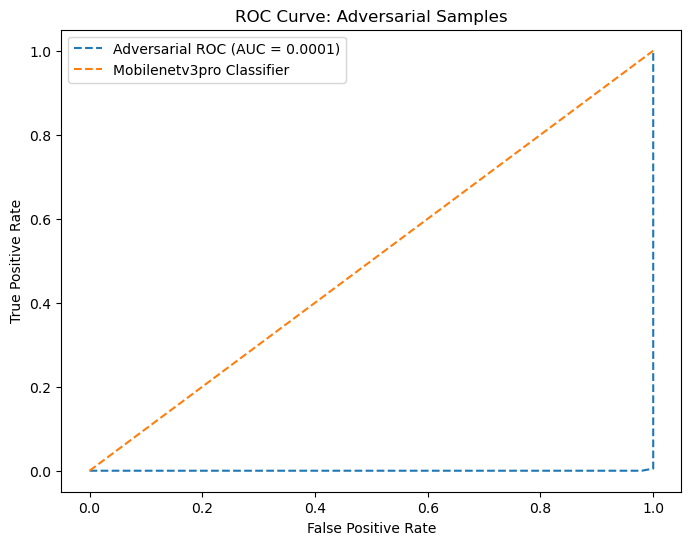

In [10]:
# **计算 Precision, Recall, F1**
y_pred_adv_binary = (y_pred_adv >= eer_threshold).astype(int)
precision_adv = precision_score(adv_labels, y_pred_adv_binary)
recall_adv = recall_score(adv_labels, y_pred_adv_binary)
f1_adv = f1_score(adv_labels, y_pred_adv_binary)

# **打印对抗攻击评估结果**
print("\n------ Adversarial Attack Evaluation (PGD) ------")
print(f"EER (Adversarial): {eer_adv * 100:.2f}%" if not np.isnan(eer_adv) else "EER (Adversarial): Cannot be computed")
print(f"Precision (Adversarial): {precision_adv * 100:.2f}%")
print(f"Recall (Adversarial): {recall_adv * 100:.2f}%")
print(f"F1-Score (Adversarial): {f1_adv * 100:.2f}%")
print(f"Avg Inference Time (Adversarial): {adv_inference_time:.2f} ms per image")

# **绘制对抗样本 ROC 曲线**
plt.figure(figsize=(8, 6))
if not np.isnan(fpr_adv).all() and not np.isnan(tpr_adv).all():
    plt.plot(fpr_adv, tpr_adv, label='Adversarial ROC (AUC = {:.4f})'.format(auc(fpr_adv, tpr_adv)), linestyle='dashed')
plt.plot([0, 1], [0, 1], linestyle='--', label="Mobilenetv3pro Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Adversarial Samples')
plt.legend()
plt.show()

### Resnet 101 prediction

Epoch 1/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3894s 1s/step - accuracy: 0.6482 - loss: 0.6123 - val_accuracy: 0.7579 - val_loss: 0.4466
Epoch 2/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3716s 1s/step - accuracy: 0.7411 - loss: 0.4923 - val_accuracy: 0.7181 - val_loss: 0.5610
Epoch 3/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3715s 1s/step - accuracy: 0.7584 - loss: 0.4733 - val_accuracy: 0.7641 - val_loss: 0.4556
Epoch 4/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3811s 1s/step - accuracy: 0.7649 - loss: 0.4677 - val_accuracy: 0.7830 - val_loss: 0.4238
Epoch 5/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3732s 1s/step - accuracy: 0.7688 - loss: 0.4556 - val_accuracy: 0.7606 - val_loss: 0.4170
Epoch 6/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3727s 1s/step - accuracy: 0.7805 - loss: 0.4437 - val_accuracy: 0.7765 - val_loss: 0.4006
Epoch 7/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3711s 1s/step - accuracy: 0.7850 - loss: 0.4351 - val_accuracy: 0.7469 - val_loss: 0.4062
Epoch 8/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 3731s 1s/step - accuracy: 0.7870 -

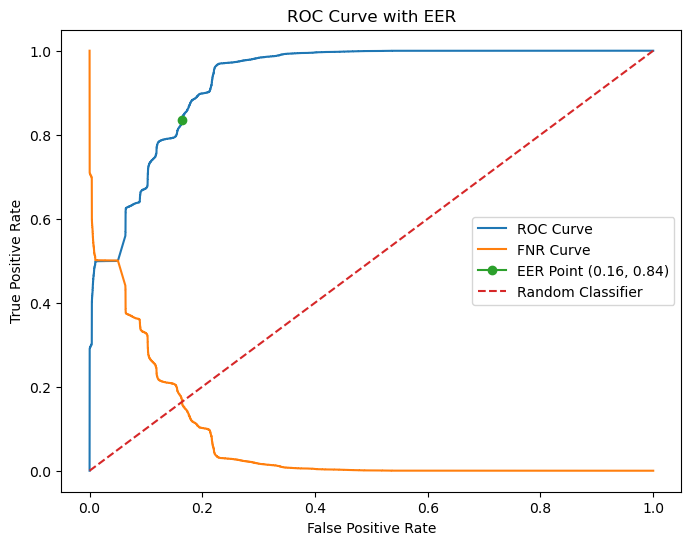

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
from scipy.optimize import brentq
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import time

# Load pre-trained ResNet-101 model (without top layer)
base_model = ResNet101(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add custom classification layers
model_resnet101 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model_resnet101.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model_resnet101.fit(train_generator, epochs=30, validation_data=val_generator)

# Evaluate model on test set
test_loss, test_acc = model_resnet101.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')

# Get true labels
y_true = test_generator.classes

# Predict probabilities
start_time = time.time()
y_pred_prob = model_resnet101.predict(test_generator).ravel()
end_time = time.time()
elapsed_time = end_time - start_time
avg_inference_time = (elapsed_time / len(test_generator)) * 1000  # ms per batch

# Compute ROC & AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Compute EER
fnr = 1 - tpr
eer_index = np.nanargmin(np.abs(fpr - fnr))
eer_threshold = thresholds[eer_index]
eer = fpr[eer_index]

# Predict binary labels with EER threshold
y_pred_binary = (y_pred_prob >= eer_threshold).astype(int)

# Compute Precision, Recall, F1
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)

# Print metrics
print(f'Optimal Threshold (EER): {eer_threshold:.4f}')
print(f'EER: {eer * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Avg Inference Time: {avg_inference_time:.2f} ms per batch')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()


In [20]:
# Estimate model size in MB
num_params = model_resnet101.count_params()
model_size_mb = num_params * 4 / (1024 ** 2)  # float32 uses 4 bytes

print(f"Model Parameters: {num_params:,}")
print(f"Estimated Model Size: {model_size_mb:.2f} MB")


Model Parameters: 43,182,977
Estimated Model Size: 164.73 MB


### PGD attack

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

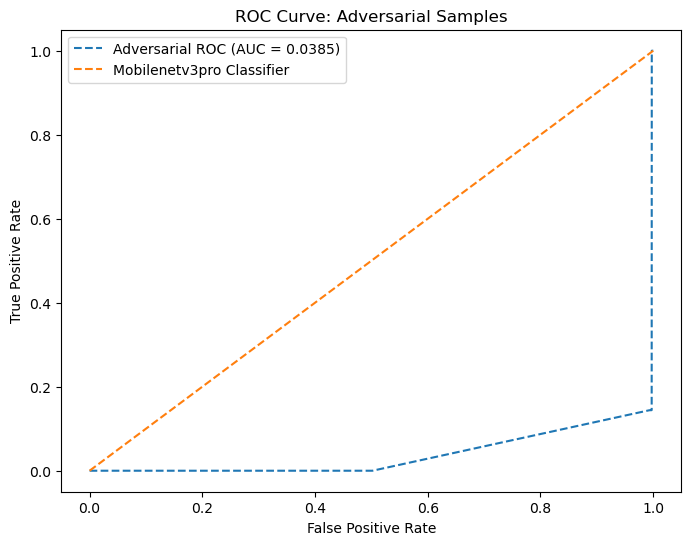

In [13]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# **对抗攻击 - Projected Gradient Descent (PGD)**
# ------------------------------------------------------------
def pgd_attack(image, label, model, epsilon=0.03, alpha=0.005, iterations=10):
    """ 生成对抗样本 (PGD) """
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    label = tf.convert_to_tensor(label, dtype=tf.float32)
    
    if len(image.shape) == 3:
        image = tf.expand_dims(image, axis=0)
    
    adv_image = tf.identity(image)
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_image)
            prediction = model(adv_image, training=False)
            loss = tf.keras.losses.binary_crossentropy(tf.reshape(label, (-1, 1)), prediction)
        
        gradient = tape.gradient(loss, adv_image)
        perturbation = alpha * tf.sign(gradient)
        adv_image = adv_image + perturbation
        adv_image = tf.clip_by_value(adv_image, image - epsilon, image + epsilon)
        adv_image = tf.clip_by_value(adv_image, 0, 1)  # 保持像素值在 [0,1]
    
    return adv_image.numpy().squeeze(0)

# **对抗攻击 + 逐批处理，避免 OOM**
y_test = test_generator.classes
batch_size = test_generator.batch_size  # 获取批量大小

# 计算 EER 需要的变量
y_pred_adv_list = []
adv_labels_list = []

start_time = time.time()

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]  # 逐批加载数据
    adv_batch = np.array([pgd_attack(x, y, model_resnet101) for x, y in zip(x_batch, y_batch)])  # 生成对抗样本
    
    # 逐批进行预测，避免 OOM
    y_pred_adv_batch = model_resnet101.predict(adv_batch).ravel()
    
    y_pred_adv_list.append(y_pred_adv_batch)
    adv_labels_list.append(y_batch)

end_time = time.time()
adv_inference_time = (end_time - start_time) / len(y_test) * 1000  # 计算平均推理时间

# **拼接所有对抗样本预测结果**
y_pred_adv = np.concatenate(y_pred_adv_list, axis=0)
adv_labels = np.concatenate(adv_labels_list, axis=0)

# **计算对抗样本 EER**
fpr_adv, tpr_adv, thresholds_adv = roc_curve(adv_labels, y_pred_adv)

if np.isnan(fpr_adv).all() or np.isnan(tpr_adv).all():
    eer_adv = np.nan
else:
    eer_index_adv = np.nanargmin(np.abs(fpr_adv - (1 - tpr_adv)))
    eer_adv = fpr_adv[eer_index_adv]

# **计算 Precision, Recall, F1**
y_pred_adv_binary = (y_pred_adv >= eer_threshold).astype(int)
precision_adv = precision_score(adv_labels, y_pred_adv_binary)
recall_adv = recall_score(adv_labels, y_pred_adv_binary)
f1_adv = f1_score(adv_labels, y_pred_adv_binary)

# **打印对抗攻击评估结果**
print("\n------ Adversarial Attack Evaluation (PGD) ------")
print(f"EER (Adversarial): {eer_adv * 100:.2f}%" if not np.isnan(eer_adv) else "EER (Adversarial): Cannot be computed")
print(f"Precision (Adversarial): {precision_adv * 100:.2f}%")
print(f"Recall (Adversarial): {recall_adv * 100:.2f}%")
print(f"F1-Score (Adversarial): {f1_adv * 100:.2f}%")
print(f"Avg Inference Time (Adversarial): {adv_inference_time:.2f} ms per image")

# **绘制对抗样本 ROC 曲线**
plt.figure(figsize=(8, 6))
if not np.isnan(fpr_adv).all() and not np.isnan(tpr_adv).all():
    plt.plot(fpr_adv, tpr_adv, label='Adversarial ROC (AUC = {:.4f})'.format(auc(fpr_adv, tpr_adv)), linestyle='dashed')
plt.plot([0, 1], [0, 1], linestyle='--', label="Mobilenetv3pro Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Adversarial Samples')
plt.legend()
plt.show()


### Efficient net prediction

Epoch 1/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1354s 481ms/step - accuracy: 0.5070 - loss: 0.6976 - val_accuracy: 0.6902 - val_loss: 0.6815
Epoch 2/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1321s 474ms/step - accuracy: 0.5123 - loss: 0.6929 - val_accuracy: 0.6902 - val_loss: 0.6815
Epoch 3/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1323s 475ms/step - accuracy: 0.5144 - loss: 0.6928 - val_accuracy: 0.6902 - val_loss: 0.6812
Epoch 4/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1334s 479ms/step - accuracy: 0.5161 - loss: 0.6927 - val_accuracy: 0.6902 - val_loss: 0.6870
Epoch 5/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1333s 478ms/step - accuracy: 0.5127 - loss: 0.6929 - val_accuracy: 0.6902 - val_loss: 0.6813
Epoch 6/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1331s 477ms/step - accuracy: 0.5126 - loss: 0.6929 - val_accuracy: 0.6902 - val_loss: 0.6816
Epoch 7/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1335s 479ms/step - accuracy: 0.5134 - loss: 0.6928 - val_accuracy: 0.6902 - val_loss: 0.6815
Epoch 8/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1336s 479ms/s

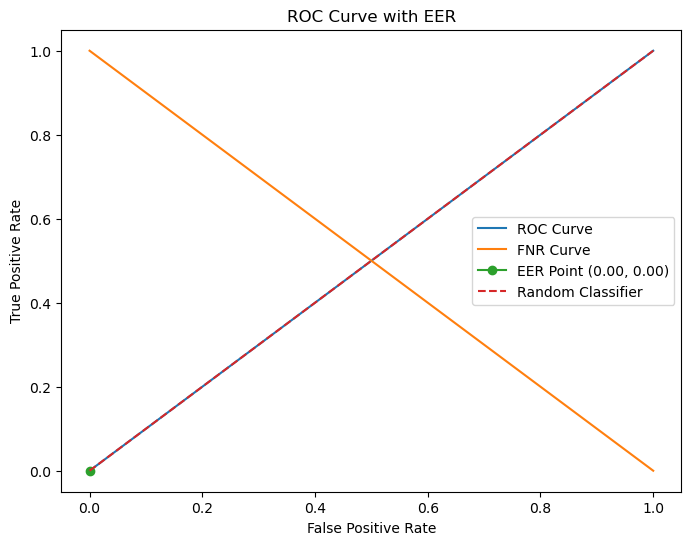

In [10]:
from tensorflow.keras.applications import EfficientNetV2B1
base_model = EfficientNetV2B1(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
# Freeze base model
base_model.trainable = False

# Add custom classification layers
model_efficientnet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model_efficientnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model_efficientnet.fit(train_generator, epochs=30, validation_data=val_generator)
# Assume y_true and y_pred_prob are your true labels and predicted probabilities
y_true = test_generator.classes  # True labels
y_pred_efficientnet = model_efficientnet.predict(test_generator)  # Predicted probabilities

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_efficientnet)

# Calculate FNR (False Negative Rate)
fnr = 1 - tpr

# Find the optimal threshold where FPR equals FNR (EER)
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"EER: {eer * 100:.2f}%")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()

### Mobilenet v1 prediction

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import time
import os

# 设置GPU内存动态增长
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 加载预训练模型（不包含分类头）
base_model = tf.keras.applications.MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# 构建分类头
model_mobilenet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # 二分类问题
])

model_mobilenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model_mobilenet.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

# 评估模型
test_loss, test_acc = model_mobilenet.evaluate(test_generator)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# 获取预测结果
y_true = test_generator.classes
start_time = time.time()  # 记录开始时间
y_pred_prob = model_mobilenet.predict(test_generator)
end_time = time.time()  # 记录结束时间
elapsed_time = end_time - start_time  # 计算运行时间

# 计算 EER
y_pred = (y_pred_prob > 0.5).astype(int)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
fnr = 1 - tpr
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

# 计算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 计算模型大小（MB）
model_mobilenet.save("temp_model.h5")
model_size = os.path.getsize("temp_model.h5") / (1024 * 1024)  # 转换为 MB
os.remove("temp_model.h5")

# 计算推理时间（Inference Time）
num_samples = 100
test_samples = np.random.rand(num_samples, 224, 224, 3).astype(np.float32)
start_time = time.time()
model_mobilenet.predict(test_samples)
inference_time = (time.time() - start_time) / num_samples  # 平均每个样本的推理时间

# 输出结果
print(f"Optimal Threshold: {optimal_threshold}")
print(f"EER: {eer * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Model Size: {model_size:.2f} MB")
print(f"Inference Time per Sample: {inference_time:.6f} seconds")
print(f"模型运行时间: {elapsed_time:.4f} 秒")

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mobilenet v1 ROC Curve with EER')
plt.legend()
plt.show()


Epoch 1/30


OverflowError: Exception encountered when calling Conv2D.call().

[1mPython int too large to convert to C long[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)

### PGD attack 

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# **对抗攻击 - Projected Gradient Descent (PGD)**
# ------------------------------------------------------------
def pgd_attack(image, label, model, epsilon=0.1, alpha=0.01, iterations=10):
    """ 生成对抗样本 (PGD) """
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    label = tf.convert_to_tensor(label, dtype=tf.float32)
    
    if len(image.shape) == 3:
        image = tf.expand_dims(image, axis=0)
    
    adv_image = tf.identity(image)
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_image)
            prediction = model(adv_image, training=False)
            loss = tf.keras.losses.binary_crossentropy(tf.reshape(label, (-1, 1)), prediction)
        
        gradient = tape.gradient(loss, adv_image)
        perturbation = alpha * tf.sign(gradient)
        adv_image = adv_image + perturbation
        adv_image = tf.clip_by_value(adv_image, image - epsilon, image + epsilon)
        adv_image = tf.clip_by_value(adv_image, 0, 1)  # 保持像素值在 [0,1]
    
    return adv_image.numpy().squeeze(0)

# **对抗攻击 + 逐批处理，避免 OOM**
y_test = test_generator.classes
batch_size = test_generator.batch_size  # 获取批量大小

# 计算 EER 需要的变量
y_pred_adv_list = []
adv_labels_list = []

start_time = time.time()

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]  # 逐批加载数据
    adv_batch = np.array([pgd_attack(x, y, model_mobilenet) for x, y in zip(x_batch, y_batch)])  # 生成对抗样本
    
    # 逐批进行预测，避免 OOM
    y_pred_adv_batch = model_mobilenet.predict(adv_batch).ravel()
    
    y_pred_adv_list.append(y_pred_adv_batch)
    adv_labels_list.append(y_batch)

end_time = time.time()
adv_inference_time = (end_time - start_time) / len(y_test) * 1000  # 计算平均推理时间

# **拼接所有对抗样本预测结果**
y_pred_adv = np.concatenate(y_pred_adv_list, axis=0)
adv_labels = np.concatenate(adv_labels_list, axis=0)

# **计算对抗样本 EER**
fpr_adv, tpr_adv, thresholds_adv = roc_curve(adv_labels, y_pred_adv)

if np.isnan(fpr_adv).all() or np.isnan(tpr_adv).all():
    eer_adv = np.nan
else:
    eer_index_adv = np.nanargmin(np.abs(fpr_adv - (1 - tpr_adv)))
    eer_adv = fpr_adv[eer_index_adv]

# **计算 Precision, Recall, F1**
y_pred_adv_binary = (y_pred_adv >= optimal_threshold).astype(int)
precision_adv = precision_score(adv_labels, y_pred_adv_binary)
recall_adv = recall_score(adv_labels, y_pred_adv_binary)
f1_adv = f1_score(adv_labels, y_pred_adv_binary)

# **打印对抗攻击评估结果**
print("\n------ Adversarial Attack Evaluation (PGD) ------")
print(f"EER (Adversarial): {eer_adv * 100:.2f}%" if not np.isnan(eer_adv) else "EER (Adversarial): Cannot be computed")
print(f"Precision (Adversarial): {precision_adv * 100:.2f}%")
print(f"Recall (Adversarial): {recall_adv * 100:.2f}%")
print(f"F1-Score (Adversarial): {f1_adv * 100:.2f}%")
print(f"Avg Inference Time (Adversarial): {adv_inference_time:.2f} ms per image")

# **绘制对抗样本 ROC 曲线**
plt.figure(figsize=(8, 6))
if not np.isnan(fpr_adv).all() and not np.isnan(tpr_adv).all():
    plt.plot(fpr_adv, tpr_adv, label='Adversarial ROC (AUC = {:.4f})'.format(auc(fpr_adv, tpr_adv)), linestyle='dashed')
plt.plot([0, 1], [0, 1], linestyle='--', label="Mobilenetv3 Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Adversarial Samples')
plt.legend()
plt.show()


### Mobilenet v3

Epoch 1/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 2349s 840ms/step - accuracy: 0.7496 - loss: 0.5983 - val_accuracy: 0.3098 - val_loss: 44.5695 - learning_rate: 0.0010
Epoch 2/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1290s 463ms/step - accuracy: 0.9435 - loss: 0.1517 - val_accuracy: 0.4681 - val_loss: 14.1928 - learning_rate: 0.0010
Epoch 3/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1294s 464ms/step - accuracy: 0.9630 - loss: 0.1023 - val_accuracy: 0.6546 - val_loss: 6.5239 - learning_rate: 0.0010
Epoch 4/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1293s 464ms/step - accuracy: 0.9712 - loss: 0.0844 - val_accuracy: 0.7335 - val_loss: 18.0520 - learning_rate: 0.0010
Epoch 5/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1292s 464ms/step - accuracy: 0.9759 - loss: 0.0691 - val_accuracy: 0.7489 - val_loss: 5.9861 - learning_rate: 0.0010
Epoch 6/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 1293s 464ms/step - accuracy: 0.9779 - loss: 0.0642 - val_accuracy: 0.6912 - val_loss: 27.2090 - learning_rate: 0.0010
Epoch 7/30
2783/2783 ━━━━━━━━━━━━━━━━━━━━ 

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 537ms/step
Optimal Threshold: 0.5531488656997681
EER: 6.05%
Precision: 0.9199
Recall: 0.9425
F1-score: 0.9311
Model Size: 154.35 MB
Inference Time per Sample: 0.030133 seconds


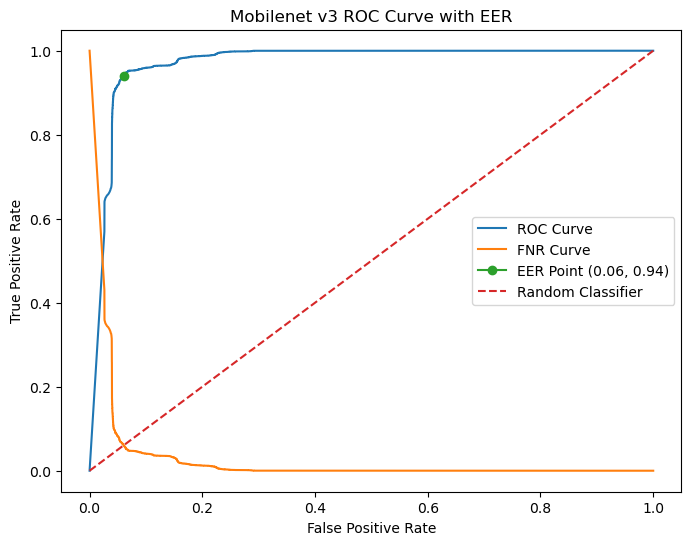

In [33]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# 加载预训练模型（不包含分类头）
base_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# 冻结大部分层（只训练最后几层）
for layer in base_model.layers[:-10]:
    layer.trainable = False

# 构建分类头
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)  # 二分类问题

# 组合模型
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 回调函数：提前停止 & 动态调整学习率
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)

# 训练模型
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, reduce_lr]
)

# 评估模型
y_true = test_generator.classes  # 真实标签
y_pred_prob = model.predict(test_generator)  # 预测概率
y_pred = (y_pred_prob > 0.5).astype(int)  # 二值化预测结果

# 计算 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
fnr = 1 - tpr

# 计算 EER
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

# 计算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 计算模型大小（MB）
model.save("temp_model.h5")
model_size = os.path.getsize("temp_model.h5") / (1024 * 1024)  # 转换为 MB
os.remove("temp_model.h5")

# 计算推理时间（Inference Time）
num_samples = 100
test_samples = np.random.rand(num_samples, 224, 224, 3).astype(np.float32)
start_time = time.time()
model.predict(test_samples)
inference_time = (time.time() - start_time) / num_samples  # 平均每个样本的推理时间

# 输出结果
print(f"Optimal Threshold: {optimal_threshold}")
print(f"EER: {eer * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Model Size: {model_size:.2f} MB")
print(f"Inference Time per Sample: {inference_time:.6f} seconds")

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mobilenet v3 ROC Curve with EER')
plt.legend()
plt.show()


### PGD attack 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

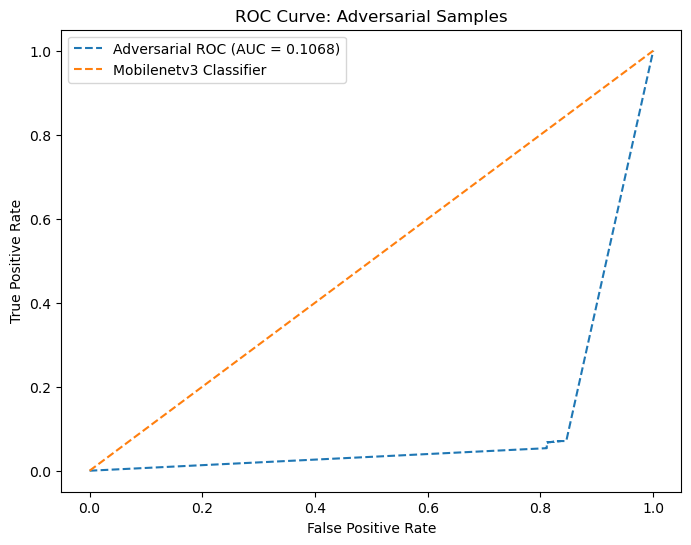

In [34]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# **对抗攻击 - Projected Gradient Descent (PGD)**
# ------------------------------------------------------------
def pgd_attack(image, label, model, epsilon=0.1, alpha=0.01, iterations=10):
    """ 生成对抗样本 (PGD) """
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    label = tf.convert_to_tensor(label, dtype=tf.float32)
    
    if len(image.shape) == 3:
        image = tf.expand_dims(image, axis=0)
    
    adv_image = tf.identity(image)
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_image)
            prediction = model(adv_image, training=False)
            loss = tf.keras.losses.binary_crossentropy(tf.reshape(label, (-1, 1)), prediction)
        
        gradient = tape.gradient(loss, adv_image)
        perturbation = alpha * tf.sign(gradient)
        adv_image = adv_image + perturbation
        adv_image = tf.clip_by_value(adv_image, image - epsilon, image + epsilon)
        adv_image = tf.clip_by_value(adv_image, 0, 1)  # 保持像素值在 [0,1]
    
    return adv_image.numpy().squeeze(0)

# **对抗攻击 + 逐批处理，避免 OOM**
y_test = test_generator.classes
batch_size = test_generator.batch_size  # 获取批量大小

# 计算 EER 需要的变量
y_pred_adv_list = []
adv_labels_list = []

start_time = time.time()

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]  # 逐批加载数据
    adv_batch = np.array([pgd_attack(x, y, model) for x, y in zip(x_batch, y_batch)])  # 生成对抗样本
    
    # 逐批进行预测，避免 OOM
    y_pred_adv_batch = model.predict(adv_batch).ravel()
    
    y_pred_adv_list.append(y_pred_adv_batch)
    adv_labels_list.append(y_batch)

end_time = time.time()
adv_inference_time = (end_time - start_time) / len(y_test) * 1000  # 计算平均推理时间

# **拼接所有对抗样本预测结果**
y_pred_adv = np.concatenate(y_pred_adv_list, axis=0)
adv_labels = np.concatenate(adv_labels_list, axis=0)

# **计算对抗样本 EER**
fpr_adv, tpr_adv, thresholds_adv = roc_curve(adv_labels, y_pred_adv)

if np.isnan(fpr_adv).all() or np.isnan(tpr_adv).all():
    eer_adv = np.nan
else:
    eer_index_adv = np.nanargmin(np.abs(fpr_adv - (1 - tpr_adv)))
    eer_adv = fpr_adv[eer_index_adv]

# **计算 Precision, Recall, F1**
y_pred_adv_binary = (y_pred_adv >= optimal_threshold).astype(int)
precision_adv = precision_score(adv_labels, y_pred_adv_binary)
recall_adv = recall_score(adv_labels, y_pred_adv_binary)
f1_adv = f1_score(adv_labels, y_pred_adv_binary)

# **打印对抗攻击评估结果**
print("\n------ Adversarial Attack Evaluation (PGD) ------")
print(f"EER (Adversarial): {eer_adv * 100:.2f}%" if not np.isnan(eer_adv) else "EER (Adversarial): Cannot be computed")
print(f"Precision (Adversarial): {precision_adv * 100:.2f}%")
print(f"Recall (Adversarial): {recall_adv * 100:.2f}%")
print(f"F1-Score (Adversarial): {f1_adv * 100:.2f}%")
print(f"Avg Inference Time (Adversarial): {adv_inference_time:.2f} ms per image")

# **绘制对抗样本 ROC 曲线**
plt.figure(figsize=(8, 6))
if not np.isnan(fpr_adv).all() and not np.isnan(tpr_adv).all():
    plt.plot(fpr_adv, tpr_adv, label='Adversarial ROC (AUC = {:.4f})'.format(auc(fpr_adv, tpr_adv)), linestyle='dashed')
plt.plot([0, 1], [0, 1], linestyle='--', label="Mobilenetv3 Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Adversarial Samples')
plt.legend()
plt.show()


### Mobilenet v3 pro

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import backend as K
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import numpy as np
import time
import os

# **Focal Loss**
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-7, 1 - 1e-7)  # 避免 log(0) 错误
        pos_loss = -alpha * (y_true * K.pow(1 - y_pred, gamma) * K.log(y_pred))
        neg_loss = - (1 - alpha) * ((1 - y_true) * K.pow(y_pred, gamma) * K.log(1 - y_pred))
        return K.mean(pos_loss + neg_loss)
    return loss

# **AUC Maximization Loss**
def auc_loss():
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return loss

# **模型架构**
base_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

# 冻结大部分层（只训练最后几层）
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)

model_mobilenetv3pro = Model(inputs=base_model.input, outputs=output)

# **选择损失函数（你可以选择 Focal Loss 或 AUC Loss）**
# model.compile(optimizer="adam", loss=focal_loss(), metrics=["accuracy"])
model_mobilenetv3pro.compile(optimizer="adam", loss=auc_loss(), metrics=["accuracy"])

# **训练模型**
model_mobilenetv3pro.fit(train_generator, epochs=30, validation_data=val_generator, steps_per_epoch=len(train_generator), validation_steps=len(val_generator))

import matplotlib.pyplot as plt

# **评估模型**
y_true = test_generator.classes  # 真实标签

# **计算模型推理时间**
start_time = time.time()
y_pred_prob = model_mobilenetv3pro.predict(test_generator)  # 预测概率
end_time = time.time()
elapsed_time = end_time - start_time  # 总运行时间
avg_inference_time = (elapsed_time / len(test_generator)) * 1000  # 转换为 ms

# **计算 EER**
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
fnr = 1 - tpr
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

# **计算 Precision, Recall, F1-Score**
y_pred_binary = (y_pred_prob >= optimal_threshold).astype(int)  # 使用最优阈值转换为二进制
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)

# **计算模型大小**
model_size = model_mobilenetv3pro.count_params() * 4 / (1024 ** 2)  # 转换为 MB（假设每个参数占 4 字节）

# **打印结果**
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"EER: {eer * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"Model Size: {model_size:.2f} MB")
print(f"Avg Inference Time: {avg_inference_time:.2f} ms per image")

# **绘制 ROC 曲线**
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.show()


### PGD attack

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# **对抗攻击 - Projected Gradient Descent (PGD)**
# ------------------------------------------------------------
def pgd_attack(image, label, model, epsilon=0.03, alpha=0.005, iterations=10):
    """ 生成对抗样本 (PGD) """
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    label = tf.convert_to_tensor(label, dtype=tf.float32)
    
    if len(image.shape) == 3:
        image = tf.expand_dims(image, axis=0)
    
    adv_image = tf.identity(image)
    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_image)
            prediction = model(adv_image, training=False)
            loss = tf.keras.losses.binary_crossentropy(tf.reshape(label, (-1, 1)), prediction)
        
        gradient = tape.gradient(loss, adv_image)
        perturbation = alpha * tf.sign(gradient)
        adv_image = adv_image + perturbation
        adv_image = tf.clip_by_value(adv_image, image - epsilon, image + epsilon)
        adv_image = tf.clip_by_value(adv_image, 0, 1)  # 保持像素值在 [0,1]
    
    return adv_image.numpy().squeeze(0)

# **对抗攻击 + 逐批处理，避免 OOM**
y_test = test_generator.classes
batch_size = test_generator.batch_size  # 获取批量大小

# 计算 EER 需要的变量
y_pred_adv_list = []
adv_labels_list = []

start_time = time.time()

for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]  # 逐批加载数据
    adv_batch = np.array([pgd_attack(x, y, model_mobilenetv3pro) for x, y in zip(x_batch, y_batch)])  # 生成对抗样本
    
    # 逐批进行预测，避免 OOM
    y_pred_adv_batch = model_mobilenetv3pro.predict(adv_batch).ravel()
    
    y_pred_adv_list.append(y_pred_adv_batch)
    adv_labels_list.append(y_batch)

end_time = time.time()
adv_inference_time = (end_time - start_time) / len(y_test) * 1000  # 计算平均推理时间

# **拼接所有对抗样本预测结果**
y_pred_adv = np.concatenate(y_pred_adv_list, axis=0)
adv_labels = np.concatenate(adv_labels_list, axis=0)

# **计算对抗样本 EER**
fpr_adv, tpr_adv, thresholds_adv = roc_curve(adv_labels, y_pred_adv)

if np.isnan(fpr_adv).all() or np.isnan(tpr_adv).all():
    eer_adv = np.nan
else:
    eer_index_adv = np.nanargmin(np.abs(fpr_adv - (1 - tpr_adv)))
    eer_adv = fpr_adv[eer_index_adv]

# **计算 Precision, Recall, F1**
y_pred_adv_binary = (y_pred_adv >= optimal_threshold).astype(int)
precision_adv = precision_score(adv_labels, y_pred_adv_binary)
recall_adv = recall_score(adv_labels, y_pred_adv_binary)
f1_adv = f1_score(adv_labels, y_pred_adv_binary)

# **打印对抗攻击评估结果**
print("\n------ Adversarial Attack Evaluation (PGD) ------")
print(f"EER (Adversarial): {eer_adv * 100:.2f}%" if not np.isnan(eer_adv) else "EER (Adversarial): Cannot be computed")
print(f"Precision (Adversarial): {precision_adv * 100:.2f}%")
print(f"Recall (Adversarial): {recall_adv * 100:.2f}%")
print(f"F1-Score (Adversarial): {f1_adv * 100:.2f}%")
print(f"Avg Inference Time (Adversarial): {adv_inference_time:.2f} ms per image")

# **绘制对抗样本 ROC 曲线**
plt.figure(figsize=(8, 6))
if not np.isnan(fpr_adv).all() and not np.isnan(tpr_adv).all():
    plt.plot(fpr_adv, tpr_adv, label='Adversarial ROC (AUC = {:.4f})'.format(auc(fpr_adv, tpr_adv)), linestyle='dashed')
plt.plot([0, 1], [0, 1], linestyle='--', label="Mobilenetv3pro Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Adversarial Samples')
plt.legend()
plt.show()


In [ ]:
### add pgd attack to the model

In [26]:
pip install tensorflow==2.16.1


   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.4/377.1 MB 8.9 MB/s eta 0:00:43
   ---------------------------------------- 0.7/377.1 MB 9.5 MB/s eta 0:00:40
   ---------------------------------------- 1.0/377.1 MB 7.0 MB/s eta 0:00:54
   ---------------------------------------- 1.0/377.1 MB 7.4 MB/s eta 0:00:51
   ---------------------------------------- 1.0/377.1 MB 7.4 MB/s eta 0:00:51
   ---------------------------------------- 1.0/377.1 MB 7.4 MB/s eta 0:00:51
   ---------------------------------------- 1.5/377.1 MB 4.7 MB/s eta 0:01:21
   ---------------------------------------- 2.1/377.1 MB 6.1 MB/s eta 0:01:02
   ---------------------------------------- 2.1/377.1 MB 6.1 MB/s eta 0:01:02
   ---------------------------------------- 2.1/377.1 MB 6.1 MB/s eta 0:01:02
   ---------------------------------------- 2.1/377.1 MB 6.1 MB/s eta 0:01:02
   ---------------------------------------- 2.4/377.1 MB 4.3 MB/s eta 0

  You can safely remove it manually.
  You can safely remove it manually.


In [40]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
Note: you may need to restart the kernel to use updated packages.


In [52]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))  # Should show available GPU devices


[]


In [1]:
!pip install tensorflow==2.18.0


In [15]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))



[]


In [3]:
import tensorflow as tf

# Check if TensorFlow can access the GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import backend as K
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import numpy as np
import time
import matplotlib.pyplot as plt


# -------------------------------
# ⚔️ 优化后的 PGD 对抗样本生成
# -------------------------------
@tf.function
def fast_pgd_attack(images, labels, model, epsilon=0.01, alpha=0.003, iterations=3):
    adv_images = tf.identity(images)
    for _ in tf.range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_images)
            predictions = model(adv_images, training=False)
            loss = tf.keras.losses.binary_crossentropy(labels, predictions)
        gradient = tape.gradient(loss, adv_images)
        perturbation = alpha * tf.sign(gradient)
        adv_images = tf.clip_by_value(adv_images + perturbation, images - epsilon, images + epsilon)
        adv_images = tf.clip_by_value(adv_images, 0, 1)
    return adv_images

# -------------------------------
# 📌 自定义损失函数
# -------------------------------
def auc_loss():
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return loss

# -------------------------------
# 🧠 模型构建
# -------------------------------
base_model = MobileNetV3Large(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(1, activation="sigmoid")(x)
model_mobilenetv3pro = Model(inputs=base_model.input, outputs=output)

# -------------------------------
# ⚙️ 模型训练 - 对抗训练（PGD）
# -------------------------------
optimizer = tf.keras.optimizers.Adam()
loss_fn = auc_loss()

epochs = 5
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(train_generator):
        # 隔一跳一跳地使用对抗训练，减轻负担
        if step % 2 == 0:
            x_batch = fast_pgd_attack(x_batch, tf.reshape(y_batch, (-1, 1)), model_mobilenetv3pro)

        with tf.GradientTape() as tape:
            predictions = model_mobilenetv3pro(x_batch, training=True)
            loss = loss_fn(tf.reshape(y_batch, (-1, 1)), predictions)
        gradients = tape.gradient(loss, model_mobilenetv3pro.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_mobilenetv3pro.trainable_variables))

        if step % 10 == 0:
            print(f"Step {step}: Loss = {loss.numpy():.4f}")

# -------------------------------
# 📊 模型评估
# -------------------------------
y_true = test_generator.classes
start_time = time.time()
y_pred_prob = model_mobilenetv3pro.predict(test_generator, verbose=1)
end_time = time.time()
avg_inference_time = (end_time - start_time) / len(test_generator) * 1000

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
fnr = 1 - tpr
eer_index = np.nanargmin(np.abs(fnr - fpr))
optimal_threshold = thresholds[eer_index]
eer = fpr[eer_index]

y_pred_binary = (y_pred_prob >= optimal_threshold).astype(int)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
model_size = model_mobilenetv3pro.count_params() * 4 / (1024 ** 2)

print("\n--- Evaluation Metrics ---")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"EER: {eer * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"Model Size: {model_size:.2f} MB")
print(f"Avg Inference Time: {avg_inference_time:.2f} ms per image")

# -------------------------------
# 📈 画 ROC 曲线
# -------------------------------
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr, fnr, label='FNR Curve')
plt.plot(fpr[eer_index], tpr[eer_index], marker='o', label=f'EER Point ({fpr[eer_index]:.2f}, {tpr[eer_index]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with EER')
plt.legend()
plt.grid(True)
plt.show()



Epoch 1/5
Step 0: Loss = 0.8800
Step 10: Loss = 0.1901
Step 20: Loss = 0.3885
Step 30: Loss = 0.3830
Step 40: Loss = 0.1194
Step 50: Loss = 0.3195
Step 60: Loss = 0.1594
Step 70: Loss = 0.1711
Step 80: Loss = 0.3353
Step 90: Loss = 0.2301
Step 100: Loss = 0.1702
Step 110: Loss = 0.3373
Step 120: Loss = 0.8642
Step 130: Loss = 0.4212
Step 140: Loss = 0.1486
Step 150: Loss = 0.0746
Step 160: Loss = 0.0322
Step 170: Loss = 0.1634
Step 180: Loss = 0.1708
Step 190: Loss = 0.1451
Step 200: Loss = 0.0911
Step 210: Loss = 0.1900
Step 220: Loss = 0.0361
Step 230: Loss = 0.2128
Step 240: Loss = 0.2335
Step 250: Loss = 0.2304
Step 260: Loss = 0.0731
Step 270: Loss = 0.3098
Step 280: Loss = 0.0506
Step 290: Loss = 0.0956
Step 300: Loss = 0.0161
Step 310: Loss = 0.2605
Step 320: Loss = 0.0687
Step 330: Loss = 0.0448
Step 340: Loss = 0.0560
Step 350: Loss = 0.1407
Step 360: Loss = 0.1780
Step 370: Loss = 0.2200
Step 380: Loss = 0.0449
Step 390: Loss = 0.1097
Step 400: Loss = 0.0573
Step 410: Loss =

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt

# -----------------------------
# PGD 攻击函数（批量版）
# -----------------------------
def pgd_attack_batch(images, labels, model, epsilon=0.01, alpha=0.003, iterations=10):
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    labels = tf.convert_to_tensor(labels, dtype=tf.float32)
    labels = tf.reshape(labels, (-1, 1))  # binary_crossentropy 需要

    adv_images = tf.identity(images)

    for _ in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(adv_images)
            predictions = model(adv_images, training=False)
            loss = tf.keras.losses.binary_crossentropy(labels, predictions)
        gradient = tape.gradient(loss, adv_images)
        perturbation = alpha * tf.sign(gradient)
        adv_images = adv_images + perturbation
        adv_images = tf.clip_by_value(adv_images, images - epsilon, images + epsilon)
        adv_images = tf.clip_by_value(adv_images, 0, 1)

    return adv_images.numpy()

# -----------------------------
# 开始攻击与评估
# -----------------------------
y_test = test_generator.classes
batch_size = test_generator.batch_size

y_pred_adv_list = []
adv_labels_list = []

start_time = time.time()
batch_count = 0
max_batches = 500  # 可调节处理的批次数量
for x_batch, y_batch in test_generator:
    if batch_count >= max_batches:
        break
    adv_batch = pgd_attack_batch(x_batch, y_batch, model_mobilenetv3pro)
    y_pred_adv_batch = model_mobilenetv3pro.predict(adv_batch).ravel()
    y_pred_adv_list.append(y_pred_adv_batch)
    adv_labels_list.append(y_batch)
    batch_count += 1

end_time = time.time()
adv_inference_time = (end_time - start_time) / len(y_test) * 1000

y_pred_adv = np.concatenate(y_pred_adv_list, axis=0)
adv_labels = np.concatenate(adv_labels_list, axis=0)

# -----------------------------
# EER、Precision、Recall、F1
# -----------------------------
fpr_adv, tpr_adv, thresholds_adv = roc_curve(adv_labels, y_pred_adv)
fnr_adv = 1 - tpr_adv
if np.isnan(fpr_adv).all() or np.isnan(tpr_adv).all():
    eer_adv = np.nan
    optimal_threshold = 0.5
else:
    eer_index_adv = np.nanargmin(np.abs(fpr_adv - fnr_adv))
    eer_adv = fpr_adv[eer_index_adv]
    optimal_threshold = thresholds_adv[eer_index_adv]

# 二值化预测
y_pred_adv_binary = (y_pred_adv >= optimal_threshold).astype(int)
precision_adv = precision_score(adv_labels, y_pred_adv_binary, zero_division=0)
recall_adv = recall_score(adv_labels, y_pred_adv_binary, zero_division=0)
f1_adv = f1_score(adv_labels, y_pred_adv_binary, zero_division=0)

# -----------------------------
# 打印评估结果
# -----------------------------
print("\n------ PGD Adversarial Attack Evaluation ------")
print(f"EER (Adversarial): {eer_adv * 100:.2f}%" if not np.isnan(eer_adv) else "EER (Adversarial): Cannot be computed")
print(f"Precision (Adversarial): {precision_adv * 100:.2f}%")
print(f"Recall (Adversarial): {recall_adv * 100:.2f}%")
print(f"F1-Score (Adversarial): {f1_adv * 100:.2f}%")
print(f"Avg Inference Time (Adversarial): {adv_inference_time:.2f} ms per image")

# -----------------------------
# ROC 曲线图
# -----------------------------
plt.figure(figsize=(8, 6))
if not np.isnan(fpr_adv).all() and not np.isnan(tpr_adv).all():
    plt.plot(fpr_adv, tpr_adv, label='PGD Adversarial ROC (AUC = {:.4f})'.format(auc(fpr_adv, tpr_adv)), linestyle='dashed')
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: PGD Adversarial Attack')
plt.legend()
plt.grid()
plt.show()
